# Assignment 3 Part 2

Machine Learning Lab

Name: Gourav Kumar Shaw

Roll No.:2020CSB010

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Task 4

Download the Forest Cover Type dataset (https://www.kaggle.com/uciml/forest-cover-type-dataset) and pre-process the dummy variables to create training, test, and development set. Reduce the train data size if the system unable to process the whole dataset.

In [ ]:
import pandas as pd

_FILE_PATH = '/content/drive/MyDrive/ML_DRIVE/Assign_3/covtype.csv'

cov_df = pd.read_csv(_FILE_PATH)

cov_df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [ ]:
cov_df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [ ]:
from sklearn.preprocessing import StandardScaler

def standardize(df: "pd.DataFrame", col_name: "str") -> "pd.DataFrame":
    scaler = StandardScaler()

    df[[col_name]] = pd.DataFrame(
        data=scaler.fit_transform(df[[col_name]]),
        index=df.index,
        columns=[col_name]
    )
    return df

In [ ]:
_columns_to_scale = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
                    'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
                    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
                    'Horizontal_Distance_To_Fire_Points']

for _col in _columns_to_scale:
    cov_df = standardize(cov_df, _col)

cov_df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,-1.297805,-0.935157,-1.482820,-0.053767,-0.796273,-1.180146,0.330743,0.439143,0.142960,3.246283,...,0,0,0,0,0,0,0,0,0,5
1,-1.319235,-0.890480,-1.616363,-0.270188,-0.899197,-1.257106,0.293388,0.590899,0.221342,3.205504,...,0,0,0,0,0,0,0,0,0,5
2,-0.554907,-0.148836,-0.681563,-0.006719,0.318742,0.532212,0.816364,0.742654,-0.196691,3.126965,...,0,0,0,0,0,0,0,0,0,2
3,-0.622768,-0.005869,0.520322,-0.129044,1.227908,0.474492,0.965786,0.742654,-0.536343,3.194931,...,0,0,0,0,0,0,0,0,0,2
4,-1.301377,-0.988770,-1.616363,-0.547771,-0.813427,-1.256464,0.293388,0.540313,0.195215,3.165479,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,-2.012130,-0.023740,0.787408,-0.867697,-0.504653,-1.437962,1.040496,0.692069,-0.640851,-0.863386,...,0,0,0,0,0,0,0,0,0,3
581008,-2.029988,-0.032675,0.653865,-0.952383,-0.590424,-1.446299,1.040496,0.692069,-0.614724,-0.857345,...,0,0,0,0,0,0,0,0,0,3
581009,-2.047847,0.029873,0.386780,-0.985317,-0.676194,-1.449506,0.891075,0.894409,-0.327327,-0.850548,...,0,0,0,0,0,0,0,0,0,3
581010,-2.054990,0.128163,0.119694,-0.985317,-0.710502,-1.449506,0.666942,1.096749,0.012325,-0.842997,...,0,0,0,0,0,0,0,0,0,3


In [ ]:
cov_df[['Cover_Type']].value_counts()

Cover_Type
2             283301
1             211840
3              35754
7              20510
6              17367
5               9493
4               2747
dtype: int64

In [ ]:
# NOTE: class imbalance is present but removing it will
# remove the data that cover_type 2 is the most common data in world

cov_df = cov_df.sample(frac=0.1)

X = cov_df.drop('Cover_Type', axis=1)
y = cov_df[['Cover_Type']]


In [ ]:
y.value_counts()

Cover_Type
2             28355
1             21070
3              3592
7              2066
6              1745
5               958
4               315
dtype: int64

In [ ]:
# 80% as train
# 10% as validation
# 10% as train

from sklearn.model_selection import train_test_split

X_train, _X_rest, y_train, _y_rest = train_test_split(X, y, train_size=0.8)
X_val, X_test, y_val, y_test = train_test_split(_X_rest, _y_rest, train_size=0.5)

## Task 5

Apply multi-class classification in SVM using Forest Cover Type dataset.

In [ ]:
# https://scikit-learn.org/stable/modules/svm.html#svm
# chose LinearSVC cause no mention of kernel to be used
# and LinearSVC is the fastest


# https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score

_model = LinearSVC(max_iter=1000000).fit(X_train, y_train.iloc[:, 0])

_y_predict = _model.predict(X_val)
_accuracy = accuracy_score(y_val, _y_predict)
# 'weighted' cause it also takes imbalance of classes into account
_f1 = f1_score(y_val, _y_predict, average='weighted')

print(f"default accuracy = {_accuracy}")
print(f"default f1 = {_f1}")


default accuracy = 0.7130808950086058
default f1 = 0.6995198293744711


In [ ]:
# hyper parameter tuning

def svm_train(
    X_train: "pd.DataFrame",
    X_val: "pd.DataFrame",
    y_train: "pd.DataFrame",
    y_val: "pd.DataFrame",
    tol=1e-4,
    C=1.0
) -> "LinearSVC":
    '''
    Wrapper Function for sklearn.svm.LinearSVC
    See: https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC
    '''

    model = LinearSVC(
        tol=tol,
        C=C,
        max_iter=1000000
    ).fit(X_train, y_train.iloc[:, 0])

    y_predict = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_predict)
    f1 = f1_score(y_val, y_predict, average='weighted')

    return [tol, C, accuracy, f1]


In [ ]:
# Test 1: tolerance test
_result = []
_tolerances = [1e-5, 3.3333e-5, 6.6666e-5, 1e-4,
               3.333e-4, 6.666e-4, 1e-3]

for tol in _tolerances:
    _result.append(svm_train(X_train, X_val, y_train, y_val, tol=tol))

_df = pd.DataFrame(
    data=_result,
    columns=["Tolerance", "C", "Accuracy", "f1"]
)
print(_df)
# also sort by ascending Tolerance as less tolerance means
# less training time
best_tol = _df.sort_values(
    ['f1', 'Accuracy', 'Tolerance'], ascending=False
).iloc[0, :]['Tolerance']
print(f"best tolerance = {best_tol}")


In [ ]:
# Test 2: C values

_result = []
_c_values = [0.3333, 0.6666, 1, 3.3333, 6.6666, 10]

for c in _c_values:
    _result.append(svm_train(X_train, X_val, y_train, y_val,
                             tol=best_tol, C=c))

_df = pd.DataFrame(
    data=_result,
    columns=["Tolerance", "C", "Accuracy", "f1"]
)

print(_df)
# also sort by ascending C as for same result, smallest C
# means biggest 1/C which means stronger regularization
best_C = _df.sort_values(
    ['f1', 'Accuracy', 'C'], ascending=[False, False, True]
).iloc[0, :]['C']
print(f"best tolerance = {best_C}")


   Tolerance        C  Accuracy        f1
0      0.001   0.3333  0.703270  0.688408
1      0.001   0.6666  0.703614  0.688749
2      0.001   1.0000  0.703787  0.688978
3      0.001   3.3333  0.703787  0.688993
4      0.001   6.6666  0.703787  0.688993
5      0.001  10.0000  0.703787  0.688993
best tolerance = 3.3333


In [ ]:
# End Result after using validation dataset for all hyper-parameters

model = LinearSVC(
        tol=best_tol,
        C=best_C,
        max_iter=1000000
    ).fit(X_train, y_train.iloc[:, 0])

y_predict = model.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict, average='weighted')

print(f"Test Accuracy: {accuracy}")
print(f"Test F1: {f1}")


Test Accuracy: 0.7120977456547927
Test F1: 0.6968653563392884


## Task 6

Plot and Analyze the Confusion matrix for the above applied SVM method.

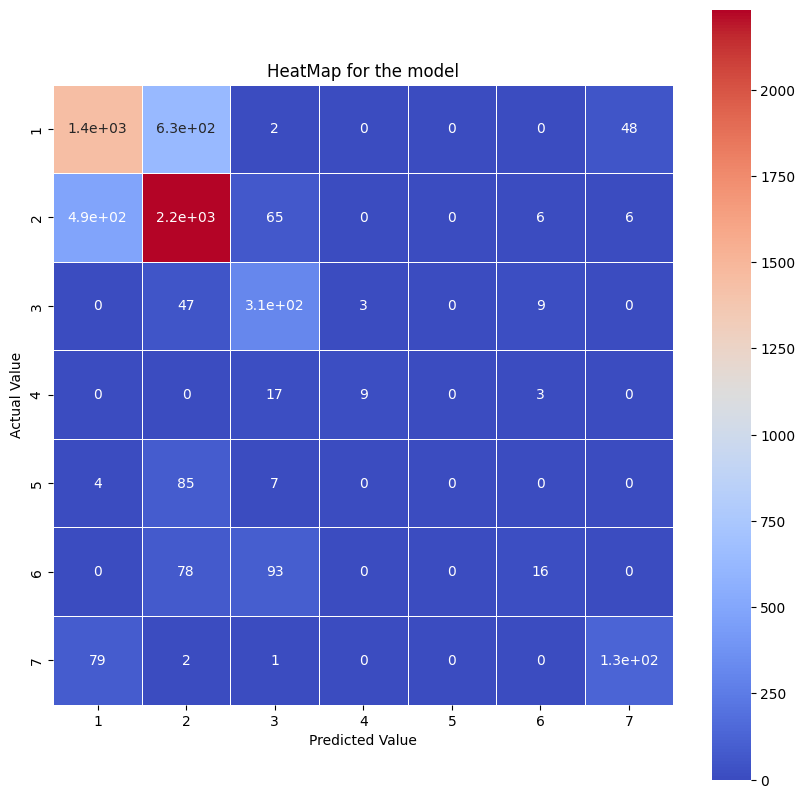

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

matrix = confusion_matrix(y_test, y_predict)
fig = plt.figure(figsize=(10,10))
sns.heatmap(
    matrix,
    xticklabels=range(1,8),
    yticklabels=range(1,8),
    linewidth=0.5,
    cmap='coolwarm',
    annot=True,
    cbar=True,
    square=True)
plt.title('HeatMap for the model')
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.show()


## Task 7

Consider only two features and three classes and train Logistic Regression 3-class Classifier (Any three-class) to show the training and test area in a 2-D plane, using matplotlib.

In [ ]:
X_train

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
289797,-2.126422,1.388063,1.321579,0.567265,0.593208,-0.794064,-2.470914,-0.471388,1.632203,-0.738027,...,0,0,0,0,0,0,0,0,0,0
153404,-0.744203,-0.818996,-0.548020,0.073262,-0.779119,-0.477887,0.666942,-0.218463,-0.536343,-0.108965,...,0,0,0,0,0,0,0,0,0,0
573602,-2.033560,-0.256062,-0.948649,-1.267604,-0.796273,-1.044825,0.779008,0.590899,-0.196691,-0.652692,...,0,0,0,0,0,0,0,0,0,0
441178,1.109471,-0.381158,-1.616363,-0.241959,-0.796273,-0.896036,0.368099,0.692069,0.221342,0.285992,...,0,0,0,0,0,0,0,1,0,0
214860,1.102328,1.254031,1.588665,-1.126460,-0.796273,2.029723,-2.732403,-0.066707,1.997982,-0.880000,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15125,-0.929928,-1.203221,0.520322,-1.126460,-0.744810,0.346226,-0.229588,-1.179579,-0.405708,3.363335,...,0,0,0,0,0,0,0,0,0,0
342062,-0.647769,-0.863673,-0.414477,-0.759486,-0.504653,-0.661308,0.592231,-0.370218,-0.614724,-0.694982,...,0,0,0,0,0,0,0,0,0,0
68235,0.148704,-1.140673,-0.815106,1.258870,-0.178726,1.921338,0.181321,-0.016122,-0.039929,2.707842,...,0,0,0,0,0,0,0,0,0,0
59323,0.759452,-0.810061,0.787408,1.503519,-0.830581,1.073497,0.853719,-1.483089,-1.555298,1.692885,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#  taking first two features

subset_X_train = X_train.iloc[:, 0:2]
subset_y_train = y_train

subset_train = subset_X_train.join(subset_y_train)
subset_train = subset_train[subset_train['Cover_Type'].isin([1,2,3])]

subset_train


,Elevation,Aspect,Cover_Type
153404,-0.744203,-0.818996,2
441178,1.109471,-0.381158,1
214860,1.102328,1.254031,1
138876,-0.347752,-0.443707,2
240723,0.552297,-0.845802,1
...,...,...,...
15125,-0.929928,-1.203221,1
342062,-0.647769,-0.863673,2
68235,0.148704,-1.140673,2
59323,0.759452,-0.810061,1


In [ ]:
model = LinearSVC().fit(
    subset_train.iloc[:, 0:2],
    subset_train.iloc[:, 2]
)

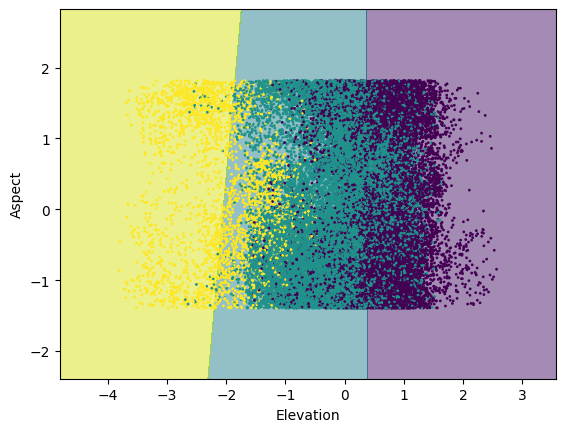

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay

disp = DecisionBoundaryDisplay.from_estimator(
    model,
    subset_train.iloc[:, 0:2],
    xlabel='Elevation',
    ylabel='Aspect',
    alpha=0.5,
    grid_resolution=5000
)

disp.ax_.scatter(
    subset_train['Elevation'],
    subset_train['Aspect'],
    c=subset_train['Cover_Type'],
    s=1
)



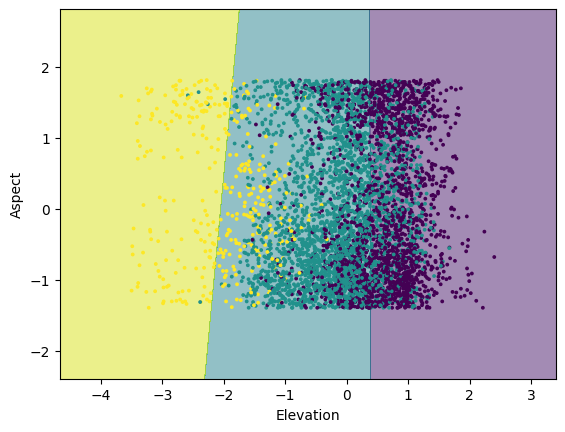

In [ ]:
subset_X_test = X_test.iloc[:, 0:2]
subset_y_test = y_test

subset_test = subset_X_test.join(subset_y_test)
subset_test = subset_test[subset_test['Cover_Type'].isin([1,2,3])]

disp = DecisionBoundaryDisplay.from_estimator(
    model,
    subset_test.iloc[:, 0:2],
    xlabel='Elevation',
    ylabel='Aspect',
    alpha=0.5,
    grid_resolution=5000
)

disp.ax_.scatter(
    subset_test['Elevation'],
    subset_test['Aspect'],
    c=subset_test['Cover_Type'],
    s=3
)